# Support Vector Rregression

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
from sklearn.svm import SVR
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class SVRRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="SVR"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = SVR
        if params is None:
            self.params = {
                'kernel': 'rbf',
                'C': 1.0,
                'epsilon': 0.1,
                'gamma': 'scale'
            }
        if params_space is None:
            self.params_space = {
                'C': Real(0.01, 100.0, prior='log-uniform'),
                'gamma': Real(0.01, 10.0, prior='log-uniform'),
                'epsilon': Real(0.001, 1.0),
                'kernel': Categorical(['linear', 'rbf', 'poly'])
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}SVR/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

# Crear una instancia del modelo XGBoost
svr_model = SVRRegressor()
svr_model.set_data(X,y)

In [4]:
svr_model.model_params_search = {
            'max_iter': 5000
        }

# Busqueda Hiperparametros

In [ ]:
opt_svr, best_params_svr = svr_model.SearchBestModel(X, y, n_iter_=1000, early_stop=False, save_result=True)
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/SVR/Modelos/opt_SVR_model_all_features.pickle', 'wb') as file:
#    pickle.dump(opt_svr, file)

In [5]:
with open(f'{path}Opt_Model/opt_SVR_model_all_features.pickle', 'rb') as file:
    opt_svr= pickle.load(file)
    best_params_svr = opt_svr.best_params_

In [18]:
resultados = opt_svr.cv_results_
svr_model.guardar_resultados_busqueda(resultados=resultados)

C:\Users/felipe/Documents/Brain\base_regressor.py:252: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(self.exponential_decay, t, y_true, p0=[C_true, tau_true, b_true])


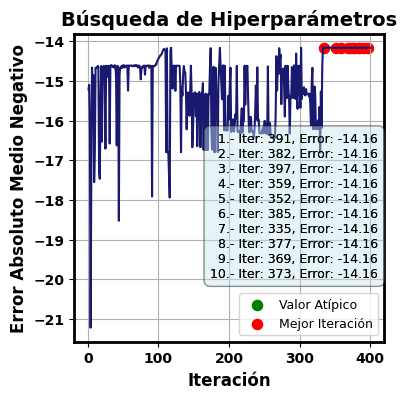

Top 1: Iteración 391, Error -14.164281162352802
Top 2: Iteración 382, Error -14.164523300663493
Top 3: Iteración 397, Error -14.164626672399226
Top 4: Iteración 359, Error -14.164640263732597
Top 5: Iteración 352, Error -14.164681632600978
Top 6: Iteración 385, Error -14.164703693277389
Top 7: Iteración 335, Error -14.16471902446607
Top 8: Iteración 377, Error -14.164740946987738
Top 9: Iteración 369, Error -14.164741511958814
Top 10: Iteración 373, Error -14.164744886418433


In [6]:
svr_model.plot_search_best_model(opt_svr, linewidth=1.5, color='midnightblue')

In [6]:
best_params_svr = svr_model.best_hyper(opt_svr)

In [7]:
best_params_svr

[{'C': 100.0, 'epsilon': 1.0, 'gamma': 0.054656235995800204, 'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 1.0, 'gamma': 0.054279335409956254, 'kernel': 'rbf'},
 {'C': 100.0,
  'epsilon': 0.9931490880104482,
  'gamma': 0.054194594891764716,
  'kernel': 'rbf'},
 {'C': 100.0,
  'epsilon': 0.9840519562652479,
  'gamma': 0.054250257648727075,
  'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 1.0, 'gamma': 0.0541551098765641, 'kernel': 'rbf'},
 {'C': 100.0,
  'epsilon': 0.9539038807545278,
  'gamma': 0.05459334122349701,
  'kernel': 'rbf'},
 {'C': 100.0,
  'epsilon': 0.998847157445789,
  'gamma': 0.054080124760750664,
  'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 1.0, 'gamma': 0.05374150374864166, 'kernel': 'rbf'},
 {'C': 100.0,
  'epsilon': 0.9751504259618623,
  'gamma': 0.05411055503873057,
  'kernel': 'rbf'},
 {'C': 100.0, 'epsilon': 1.0, 'gamma': 0.05405230232306081, 'kernel': 'rbf'}]

# Trainer

In [8]:
svr_model.model_params_train= {
            'max_iter': 5000
        }

In [9]:
results, best_model_results , best_model= svr_model.trainer(params_=best_params_svr[0])

In [10]:
with open(f'{path}Opt_Model/BestModel_SVR_all_features.pickle', 'wb') as file:
    pickle.dump(svr_model.model, file)
with open(f'{path}Opt_Model/results_SVR_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)

In [28]:
svr_model.guardar_resultados_trainer(resultados=results)

In [10]:
y_pred = svr_model.predicter(svr_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     117.6
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           4.90e-23
Time:                        15:07:27   Log-Likelihood:                -1070.9
No. Observations:                 276   AIC:                             2146.
Df Residuals:                     274   BIC:                             2153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6719      1.810     17.494      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


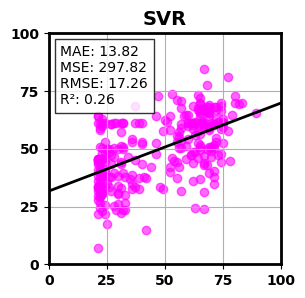

Error medio absoluto: 13.819271831280135
Error cuadrático medio: 297.8223798152182
Raíz del error cuadrático medio: 17.25753110428077
Coeficiente de determinación (R²): 0.26410424809518973


In [14]:
svr_model.plot_regresion(y=y_pred,x= svr_model.y_test, x_size=3,y_size=3,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100,x_min_limit=0,y_min_limit=0, title='SVR',label=False,color='magenta', color_line_fit="black", line_ideal=False,confidence_interval=False,alpha=0.6, legend=False)

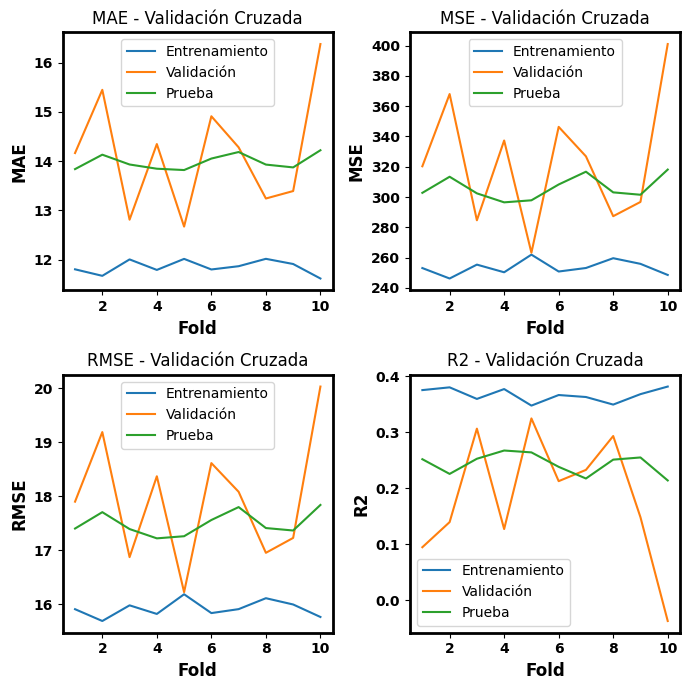

In [15]:
svr_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     117.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           4.90e-23
Time:                        20:22:46   Log-Likelihood:                -1070.9
No. Observations:                 276   AIC:                             2146.
Df Residuals:                     274   BIC:                             2153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6719      1.810     17.494      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


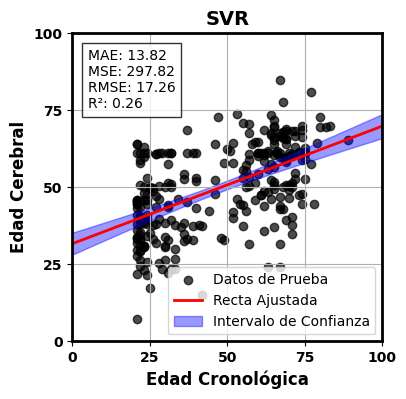

Error medio absoluto: 13.819271831280135
Error cuadrático medio: 297.8223798152182
Raíz del error cuadrático medio: 17.25753110428077
Coeficiente de determinación (R²): 0.26410424809518973


In [11]:
svr_model.plot_regresion(y=y_pred,x= svr_model.y_test,label_='Datos de Prueba' ,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100, title='SVR',line_ideal=False,confidence_interval=True, color='black',alpha=0.7,xlabel='Edad Cronológica',ylabel='Edad Cerebral',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [17]:
shap_values_, shap_sumary_sorted_ = svr_model.feature_importance_shap(X_test = svr_model.X_test, model = svr_model.model)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=100.0, epsilon=1.0, gamma=0.054656235995800204, max_iter=5000)


100%|██████████| 276/276 [18:30<00:00,  4.02s/it]

Importancia de características basada en suma de valores SHAP:
IAF_OCC_right: 1104.3757084302501
IAF_OCC_left: 947.5452337459908
TF_MFG_right: 810.406876505273
TF_SFG_right: 654.8807485465546
TF_INS_right: 651.7925534386068
Low_subj_spec_EPP_CING_left: 618.8729705456761
Low_subj_spec_EPP_PARIET_left: 530.7439308260014
IAF_IFG_right: 527.4589449711355
TF_INS_left: 507.5162512856503
IAF_ORB_left: 461.2752136900896
TF_SFG_left: 445.0156410237668
IAF_IFG_left: 409.2468267464645
IAF_ORB_right: 405.6682751026646
Alpha2_canon_RPD_OCC_left: 378.12116571401
Alpha2_canon_EPP_OCC_left: 375.60127428801576
Low_subj_spec_RPD_OCC_left: 372.3790380542062
Low_subj_spec_EPP_OCC_right: 371.7896892011582
IAF_INS_right: 344.78225774810863
Low_subj_spec_RPD_CING_right: 338.2777050532978
TF_ORB_left: 290.33936886309914
TF_IFG_right: 286.5566379929029
IAF_MFG_right: 285.6734750165792
Alpha2_canon_RPD_HPC_left: 258.320425453299
Alpha2_canon_EPP_HPC_left: 258.2530743306798
IAF_HPC_right: 245.99200581873015
Low_

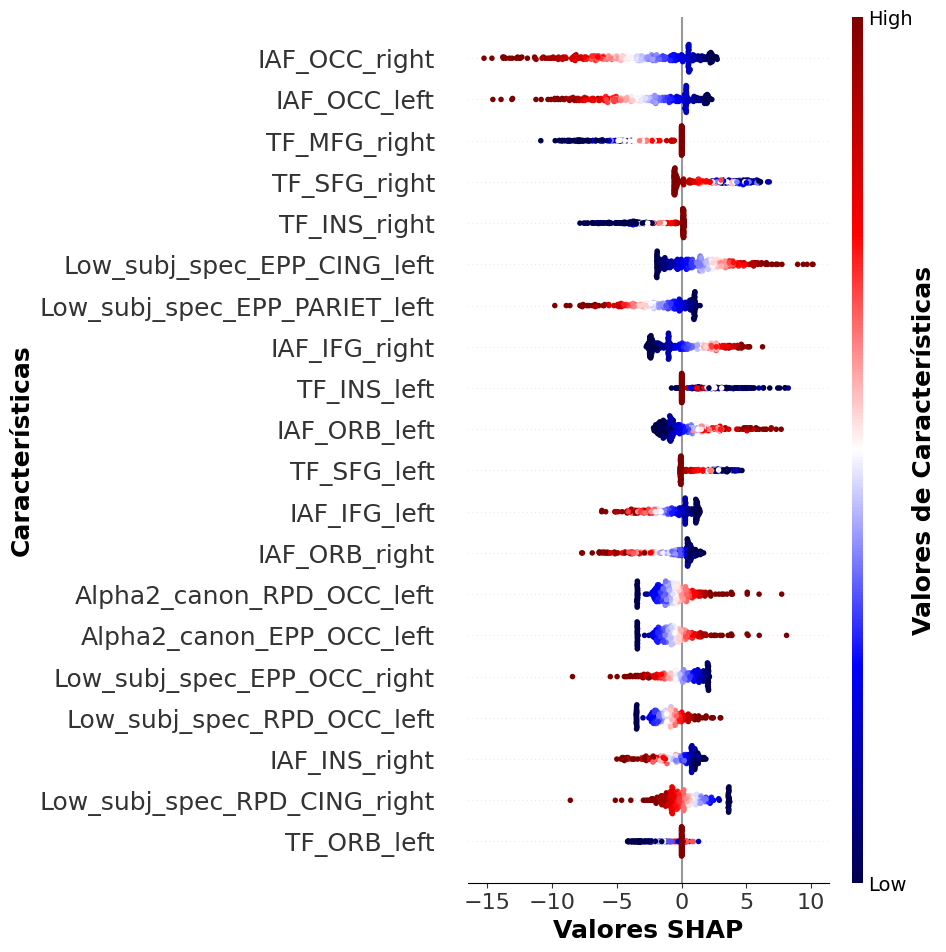

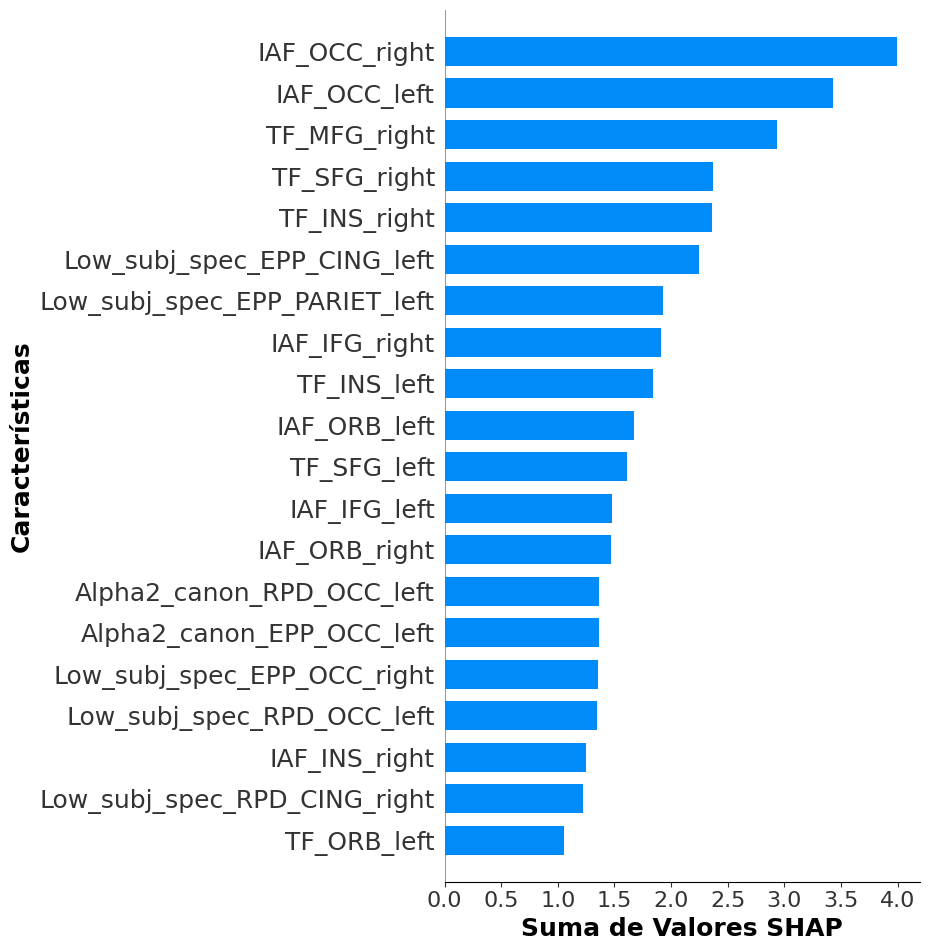

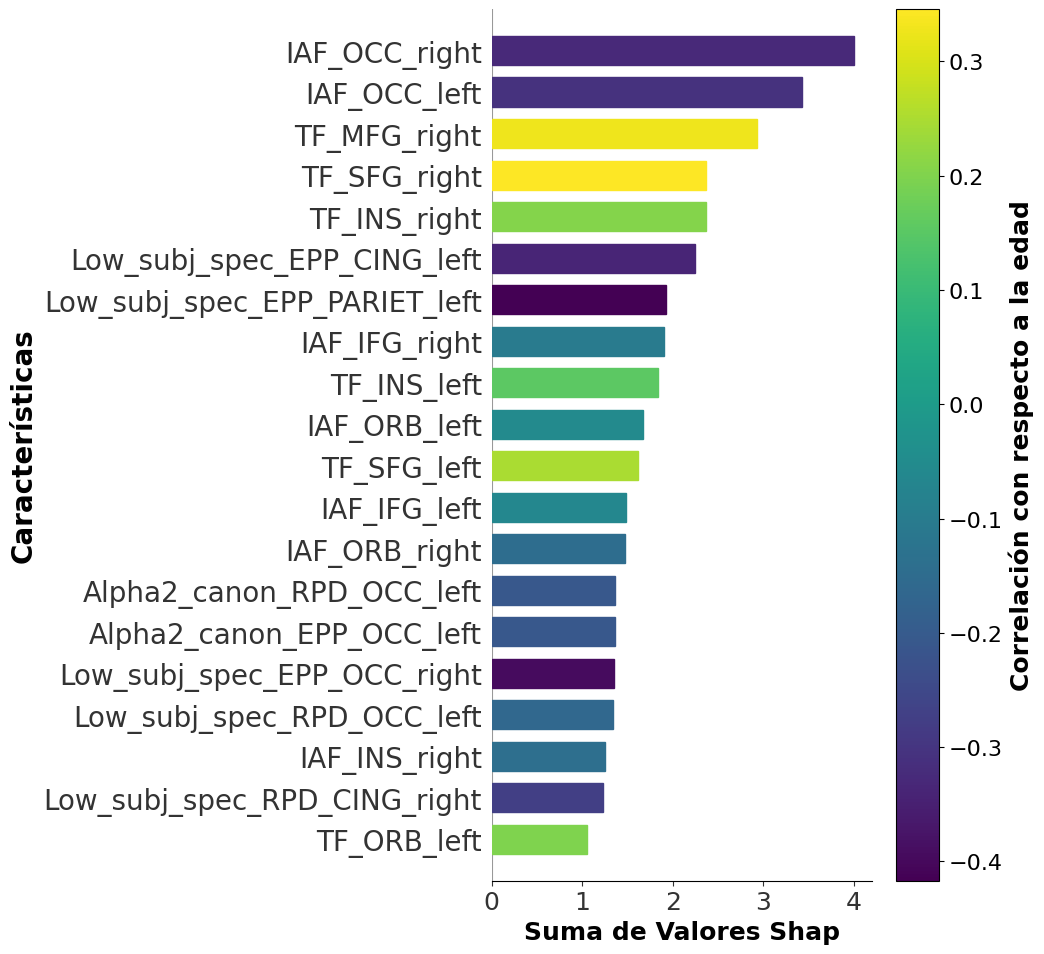

In [13]:
svr_model.plot_feature_importance(shap_values=shap_values_,X_test=svr_model.X_test,y_test=svr_model.y_test, save_fig=True)

In [14]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_svr.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted_, file)

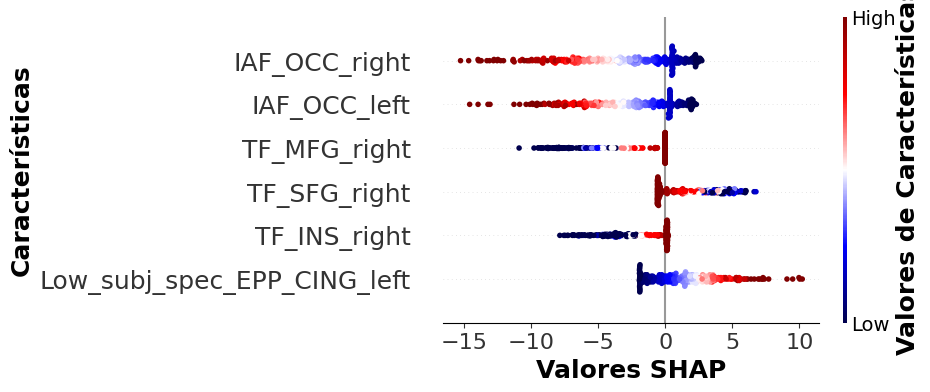

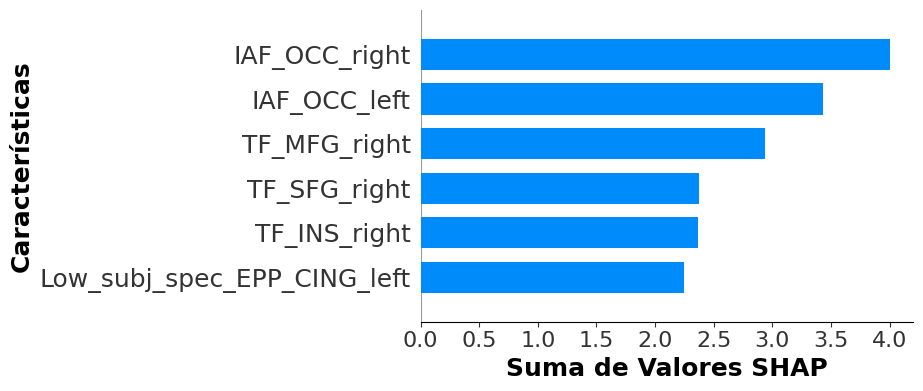

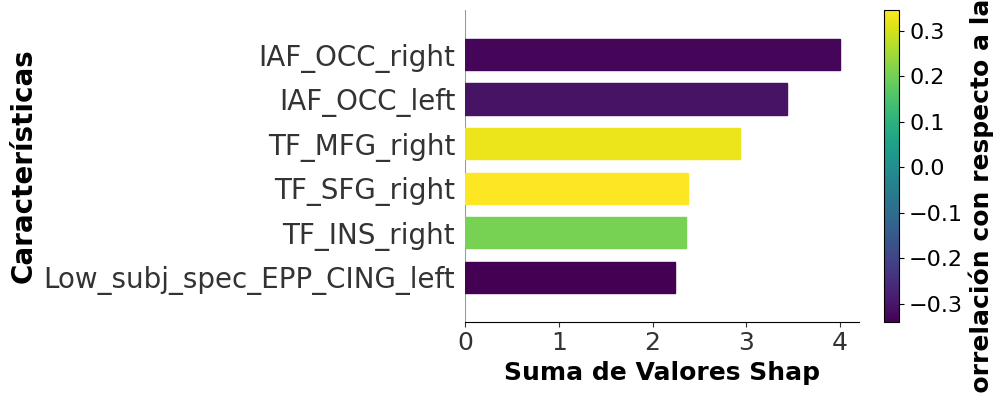

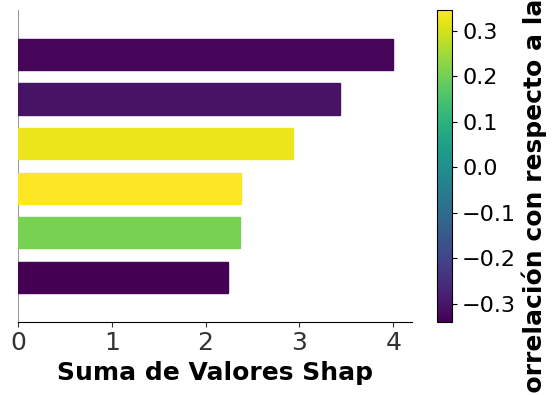

In [18]:
svr_model.plot_feature_importance(shap_values=shap_values_,X_test=svr_model.X_test,y_test=svr_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_svr.pickle', 'rb') as file:
    shap_summary_sorted_svr = pickle.load(file)


In [4]:
shap_por_region_sorted, resultado_normalizado_sorted=svr_model.shap_region(shap_summary_sorted=shap_summary_sorted_svr, num_max=20)

OCC_left: 1.000000
OCC_right: 0.713540
INS_right: 0.482059
MFG_right: 0.391483
ORB_left: 0.363729
SFG_right: 0.316320
CING_left: 0.299442
PARIET_left: 0.257183
IFG_right: 0.254567
INS_left: 0.244979
SFG_left: 0.215423
IFG_left: 0.197459
ORB_right: 0.196135
CING_right: 0.163448


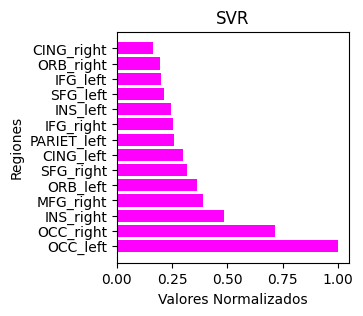

In [5]:
svr_model.plot_normalized_values(resultado_normalizado_sorted, color='magenta', name_set='SVR',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


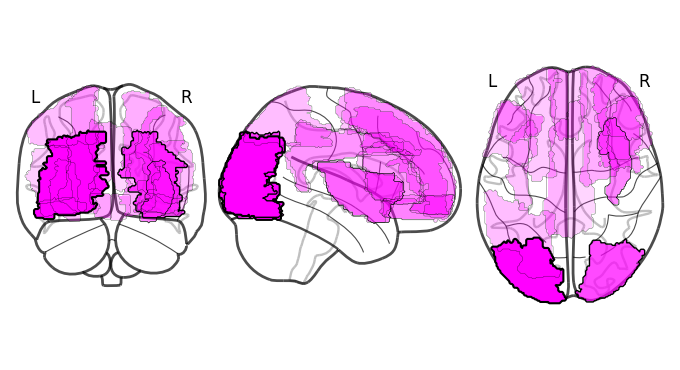

In [6]:
base_path = 'C:/Users/felipe/Documents/brain_age_/cerebritos/'

svr_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='magenta')